In [2]:
import pandas as pd
from tqdm import tqdm

In [2]:
from joblib import Parallel, delayed

In [3]:
df=pd.read_json(r"D:\downloads\reddit\submissions\RS_2016-10.zst",lines=True,chunksize=10000,compression='zst')

ValueError: Unrecognized compression type: zst
Valid compression types are ['infer', None, 'bz2', 'gzip', 'xz', 'zip']

In [67]:

for i in df:
    save_df=pd.concat([save_df,i[i.subreddit=='CryptoCurrency']])


83it [11:06,  8.02s/it]


In [69]:
save_df.to_csv('RS_2016_10_CryptoCurrency.csv')

In [71]:
from mpire import WorkerPool

In [72]:

import time


def time_consuming_function(x: int) -> int:
    time.sleep(1)   # Simulate that this function takes some time to complete
    return x


# Data which will be passed to the above function
data = range(50)

In [73]:
# MPIRE
with WorkerPool(n_jobs=5) as pool:
    results = pool.map(time_consuming_function, data, progress_bar=True)

KeyboardInterrupt: 

In [35]:
s=pd.DataFrame()

In [4]:
df=pd.read_csv(r"C:\Users\Ben\Desktop\Diplomatiki\CryptoSent\Datasets\Bitcoin_2010-2021-08.csv")

In [8]:
df.index=pd.to_datetime(df.date_parsed)

In [14]:
df.sort_values(by='score',ascending=False)

,date_parsed,date,title,body,score,num_comments,id,subreddit,submission,redditor,url,date_parsed.1,user
date_parsed,,,,,,,,,,,,,
2017-11-29,2017-11-29,1.511919e+09,"It's official! 1 Bitcoin = $10,000 USD",NaN,48495,4439,7g9cd3,Bitcoin,7g9cd3,LeeWallis,https://v.redd.it/e7io27rdgt001,2017-11-29,LeeWallis
2017-11-26,2017-11-26,1.511672e+09,It's over 9000!!!,NaN,42428,3102,7fkqh5,Bitcoin,7fkqh5,wolfwolfz,https://i.imgur.com/jyoZGyW.gifv,2017-11-26,wolfwolfz
2018-01-06,2018-01-06,1.515271e+09,Everyone who's trading BTC right now,NaN,42047,771,7olruz,Bitcoin,7olruz,NaN,http://cdn.mutually.com/wp-content/uploads/201...,2018-01-06,None
2021-01-28,2021-01-28,1.611850e+09,Robinhood just blocked several stocks from bei...,Anyone following the WSB drama this morning wi...,39978,1571,l70vrq,Bitcoin,l70vrq,Secret_Operative,https://www.reddit.com/r/Bitcoin/comments/l70v...,2021-01-28,Secret_Operative
2017-11-30,2017-11-30,1.512035e+09,I hope James is doing well,NaN,29317,1210,7gla05,Bitcoin,7gla05,KINNAHZ,https://i.redd.it/h4ngqma643101.jpg,2017-11-30,KINNAHZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-08,2016-02-08,1.454948e+09,Bitcoin Investment Trust surges as world prepa...,NaN,0,0,44rjrv,Bitcoin,44rjrv,NaN,https://www.google.com/finance?q=OTCMKTS%3AGBT...,2016-02-08,None
2016-02-08,2016-02-08,1.454946e+09,Bernie VS Hillary - Eclectic Method,[deleted],0,0,44rgkj,Bitcoin,44rgkj,NaN,https://youtu.be/-kTlBwZ4L4s,2016-02-08,None
2019-08-04,2019-08-04,1.564882e+09,Interested in Buying bitcoins,[removed],0,1,clqkzr,Bitcoin,clqkzr,juicebox57,https://www.reddit.com/r/Bitcoin/comments/clqk...,2019-08-04,juicebox57


In [10]:
df.shape

(756151, 13)

<AxesSubplot:xlabel='date_parsed'>

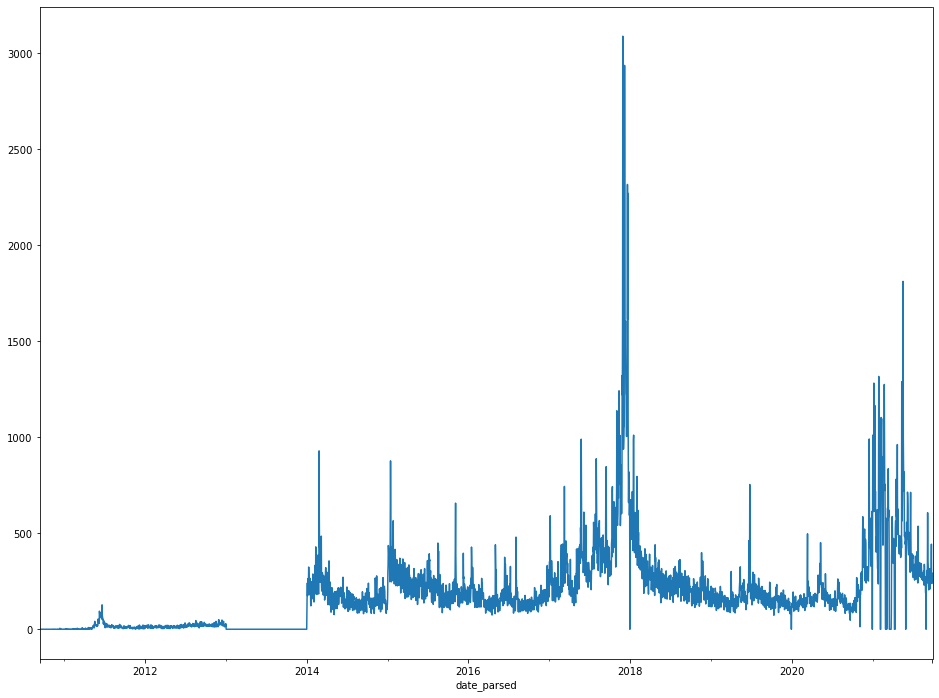

In [9]:
df.resample('d').score.count().plot(figsize=(16,12))

In [56]:
df[df.submission.astype(str).str.contains('pjvn5f')]

,date,title,body,score,num_comments,id,subreddit,submission,redditor,url,date_parsed,user
date_parsed,,,,,,,,,,,,
2021-09-07,1.631048e+09,This is how easy it is to buy Starbucks coffee...,NaN,6598,805,pjvn5f,Bitcoin,pjvn5f,mohiemen,https://v.redd.it/mcjtrhep85m71,2021-09-07,mohiemen


In [26]:
df.groupby('redditor').score.sum().sort_values(ascending=False).head(20)

redditor
DocumentingBitcoin    105000
simplelifestyle        96761
finalhedge             78613
Bitcoin_Magazine       72265
BashCo                 69038
LeeWallis              64159
rBitcoinMod            63701
NeedleworkerNo2874     60033
eragmus                58902
malramut               53551
Godfreee               52677
Egon_1                 51066
Suberg                 49946
chronic_nervosa        49293
DesignerAccount        47704
wolfwolfz              45784
TheGreatMuffin         45236
ohnoh18                44637
spookiestevie          42715
Miladran               42021
Name: score, dtype: int64